In [27]:
import cv2
import numpy as np
from glob import glob
from tqdm import tqdm
from PIL import Image
from img2vec_pytorch import Img2Vec

# Define the flower classes
potato_classes = ['Potato_EarlyBlight','Potato_healthy','Potato_LateBlight','Not_Potato']

# Load the img2vec model (example: ResNet-18)
img2vec = Img2Vec(model='resnet-18')

# Load the image data and extract features
X_train = []
y_train = []

for potato_class in potato_classes:
    image_paths = glob(f"Potato_ Dataset/{potato_class}/*.*")
    print(f"Number of images found for {potato_class}: {len(image_paths)}")

    for image_path in tqdm(image_paths):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (264, 264))  # Resize to match the input size of the img2vec model
        image_pil = Image.fromarray(image)  # Convert NumPy array to PIL image
        
        # Extract features using img2vec model
        features = img2vec.get_vec(image_pil)
        
        X_train.append(features)
        y_train.append(potato_classes.index(potato_class))

X_train = np.array(X_train)
y_train = np.array(y_train)

C:\Users\SOC\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\SOC\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Number of images found for Potato_EarlyBlight: 1939


100%|██████████████████████████████████████████████████████████████████████████████| 1939/1939 [01:11<00:00, 27.07it/s]


Number of images found for Potato_healthy: 1836


100%|██████████████████████████████████████████████████████████████████████████████| 1836/1836 [01:09<00:00, 26.56it/s]


Number of images found for Potato_LateBlight: 1939


100%|██████████████████████████████████████████████████████████████████████████████| 1939/1939 [01:20<00:00, 24.19it/s]


Number of images found for Not_Potato: 1924


100%|██████████████████████████████████████████████████████████████████████████████| 1924/1924 [01:14<00:00, 25.75it/s]


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Splitting the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)

In [29]:
# Train the SVM model with a polynomial kernel
svm_model = SVC()  # Polynomial kernel of degree 3 with default C value
svm_model.fit(x_train, y_train)

SVC()

In [31]:
import pickle
pickle.dump(svm_model, open("svm_model2.pkl","wb"))

In [32]:
import pickle
svm_model_L = pickle.load(open('svm_model2.pkl','rb'))

In [33]:
# Evaluate the SVM model on the training set
svm_train_predictions = svm_model.predict(x_train)
svm_train_accuracy = accuracy_score(y_train, svm_train_predictions)
print(f"SVM Training Accuracy: {svm_train_accuracy*100:.2f}%")

# Evaluate the SVM model on the validation set
svm_val_predictions = svm_model.predict(x_val)
svm_val_accuracy = accuracy_score(y_val, svm_val_predictions)
print(f"SVM Validation Accuracy: {svm_val_accuracy*100:.2f}%")

# Evaluate the SVM model on the test set
svm_test_predictions = svm_model.predict(x_test)
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)
print(f"SVM Test Accuracy: {svm_test_accuracy*100:.2f}%")

SVM Training Accuracy: 99.69%
SVM Validation Accuracy: 99.18%
SVM Test Accuracy: 99.35%


In [34]:
from sklearn.metrics import classification_report
y_pred = svm_model.predict(x_test) 
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        78
           1       0.99      1.00      0.99        73
           2       0.99      0.99      0.99        78
           3       1.00      1.00      1.00        77

    accuracy                           0.99       306
   macro avg       0.99      0.99      0.99       306
weighted avg       0.99      0.99      0.99       306



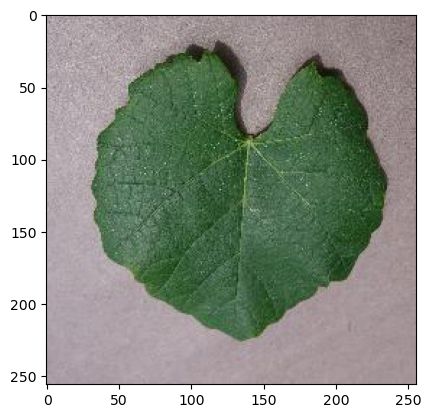

The predicted image is: Not_Potato


In [35]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
path=r"C:\Users\SOC\Prj_202\nptt.jpg"
img=image.load_img(path) 
plt.imshow(img) 
plt.show() 
# Convert the PIL Image to a NumPy array
# img_array = image.img_to_array(img)

# Resize the image
img_resized = img.resize((264,264))

# Extract features using img2vec model
features = img2vec.get_vec(img_resized)

# Reshape the features to match the expected input size of the SVM model
features = features.reshape(1, -1)

# Predict the class label using the SVM model
predicted_class_index = svm_model_L.predict(features)[0]
predicted_class = potato_classes[predicted_class_index]

print("The predicted image is:", predicted_class)

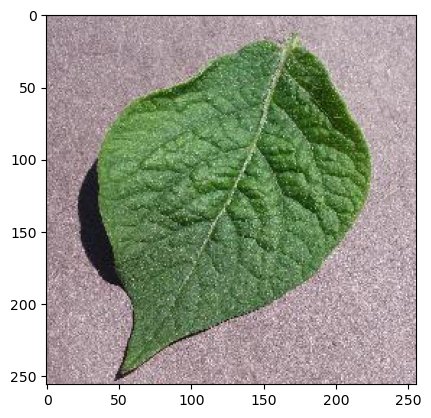

The predicted image is: Potato_healthy


In [27]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
path=r"C:\Users\SOC\Prj_202\hhh.jpg"
img=image.load_img(path) 
plt.imshow(img) 
plt.show() 
# Convert the PIL Image to a NumPy array
# img_array = image.img_to_array(img)

# Resize the image
img_resized = img.resize((264,264))

# Extract features using img2vec model
features = img2vec.get_vec(img_resized)

# Reshape the features to match the expected input size of the SVM model
features = features.reshape(1, -1)

# Predict the class label using the SVM model
predicted_class_index = svm_model_L.predict(features)[0]
predicted_class = potato_classes[predicted_class_index]

print("The predicted image is:", predicted_class)

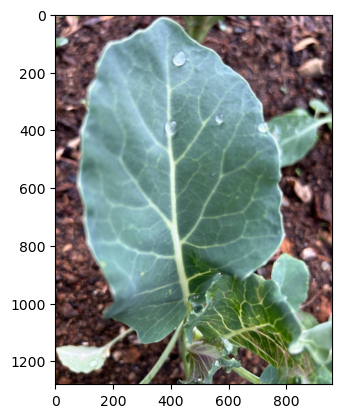

The predicted image is: Not_Potato


In [36]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
path=r"C:\Users\SOC\Prj_202\NOT.jpg"
img=image.load_img(path) 
plt.imshow(img) 
plt.show() 
# Convert the PIL Image to a NumPy array
# img_array = image.img_to_array(img)

# Resize the image
img_resized = img.resize((264,264))

# Extract features using img2vec model
features = img2vec.get_vec(img_resized)

# Reshape the features to match the expected input size of the SVM model
features = features.reshape(1, -1)

# Predict the class label using the SVM model
predicted_class_index = svm_model_L.predict(features)[0]
predicted_class = potato_classes[predicted_class_index]

print("The predicted image is:", predicted_class)

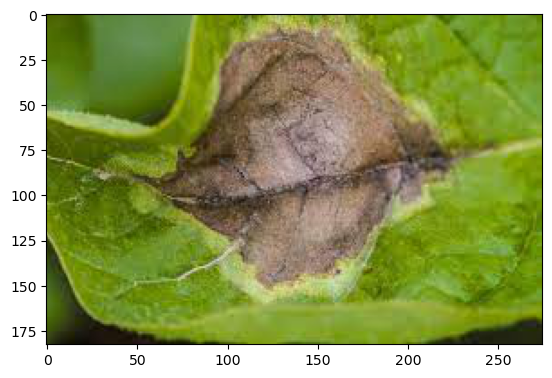

The predicted image is: Potato_LateBlight


In [37]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
path=r"C:\Users\SOC\Prj_202\late.jpeg"
img=image.load_img(path) 
plt.imshow(img) 
plt.show() 
# Convert the PIL Image to a NumPy array
# img_array = image.img_to_array(img)

# Resize the image
img_resized = img.resize((264,264))

# Extract features using img2vec model
features = img2vec.get_vec(img_resized)

# Reshape the features to match the expected input size of the SVM model
features = features.reshape(1, -1)

# Predict the class label using the SVM model
predicted_class_index = svm_model_L.predict(features)[0]
predicted_class = potato_classes[predicted_class_index]

print("The predicted image is:", predicted_class)

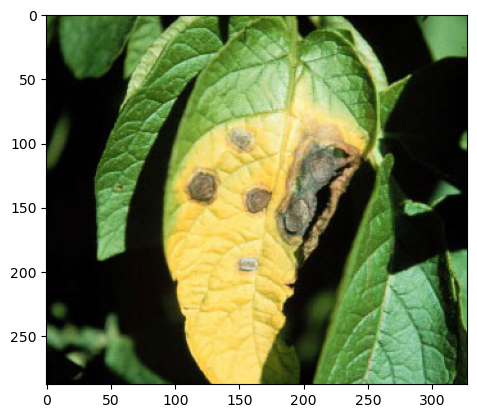

The predicted image is: Not_Potato


In [38]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
path=r"C:\Users\SOC\Prj_202\e3.jpg"
img=image.load_img(path) 
plt.imshow(img) 
plt.show() 
# Convert the PIL Image to a NumPy array
# img_array = image.img_to_array(img)

# Resize the image
img_resized = img.resize((264,264))

# Extract features using img2vec model
features = img2vec.get_vec(img_resized)

# Reshape the features to match the expected input size of the SVM model
features = features.reshape(1, -1)

# Predict the class label using the SVM model
predicted_class_index = svm_model_L.predict(features)[0]
predicted_class = potato_classes[predicted_class_index]

print("The predicted image is:", predicted_class)

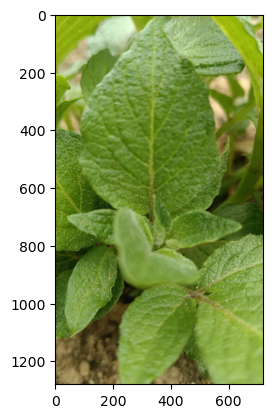

The predicted image is: Not_Potato


In [39]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
path=r"C:\Users\SOC\Prj_202\h3.jpg"
img=image.load_img(path) 
plt.imshow(img) 
plt.show() 
# Convert the PIL Image to a NumPy array
# img_array = image.img_to_array(img)

# Resize the image
img_resized = img.resize((264,264))

# Extract features using img2vec model
features = img2vec.get_vec(img_resized)

# Reshape the features to match the expected input size of the SVM model
features = features.reshape(1, -1)

# Predict the class label using the SVM model
predicted_class_index = svm_model_L.predict(features)[0]
predicted_class = potato_classes[predicted_class_index]

print("The predicted image is:", predicted_class)

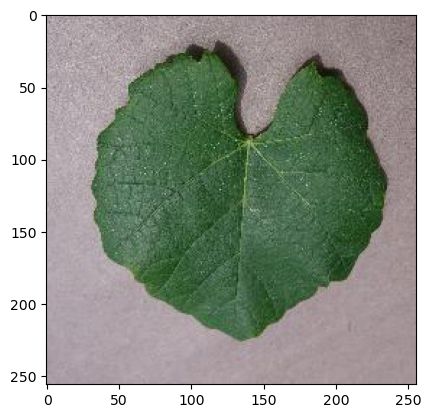

The predicted image is: Not_Potato


In [40]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
path=r"C:\Users\SOC\Prj_202\nptt.jpg"
img=image.load_img(path) 
plt.imshow(img) 
plt.show() 
# Convert the PIL Image to a NumPy array
# img_array = image.img_to_array(img)

# Resize the image
img_resized = img.resize((264,264))

# Extract features using img2vec model
features = img2vec.get_vec(img_resized)

# Reshape the features to match the expected input size of the SVM model
features = features.reshape(1, -1)

# Predict the class label using the SVM model
predicted_class_index = svm_model_L.predict(features)[0]
predicted_class = potato_classes[predicted_class_index]

print("The predicted image is:", predicted_class)

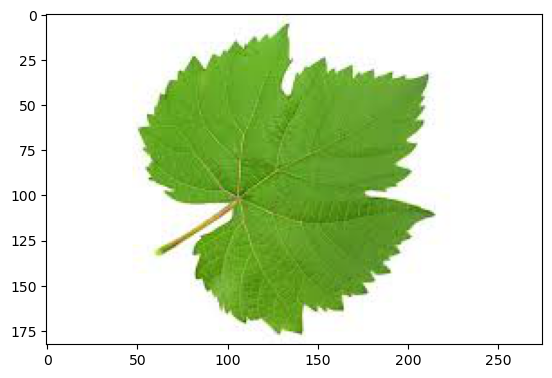

The predicted image is: Not_Potato


In [41]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
path=r"C:\Users\SOC\Prj_202\g.jpeg"
img=image.load_img(path) 
plt.imshow(img) 
plt.show() 
# Convert the PIL Image to a NumPy array
# img_array = image.img_to_array(img)

# Resize the image
img_resized = img.resize((264,264))

# Extract features using img2vec model
features = img2vec.get_vec(img_resized)

# Reshape the features to match the expected input size of the SVM model
features = features.reshape(1, -1)

# Predict the class label using the SVM model
predicted_class_index = svm_model_L.predict(features)[0]
predicted_class = potato_classes[predicted_class_index]

print("The predicted image is:", predicted_class)

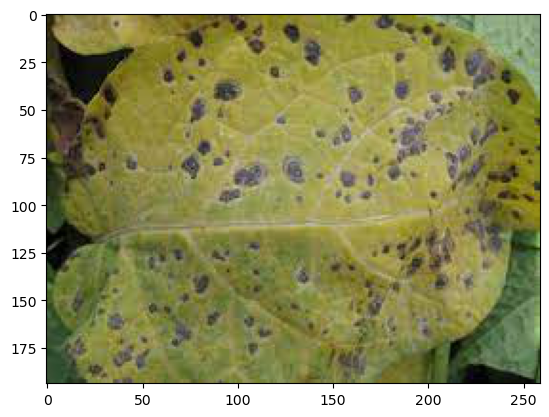

The predicted image is: Potato_EarlyBlight


In [42]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
path=r"C:\Users\SOC\Prj_202\early1.jpeg"
img=image.load_img(path) 
plt.imshow(img) 
plt.show() 
# Convert the PIL Image to a NumPy array
# img_array = image.img_to_array(img)

# Resize the image
img_resized = img.resize((264,264))

# Extract features using img2vec model
features = img2vec.get_vec(img_resized)

# Reshape the features to match the expected input size of the SVM model
features = features.reshape(1, -1)

# Predict the class label using the SVM model
predicted_class_index = svm_model_L.predict(features)[0]
predicted_class = potato_classes[predicted_class_index]

print("The predicted image is:", predicted_class)

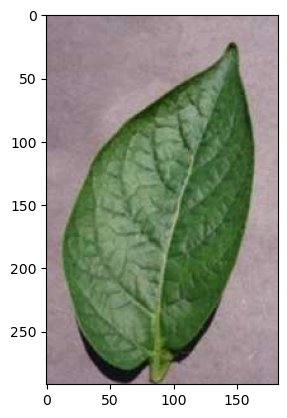

The predicted image is: Potato_healthy


In [43]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
path=r"C:\Users\SOC\Prj_202\pp.png"
img=image.load_img(path) 
plt.imshow(img) 
plt.show() 
# Convert the PIL Image to a NumPy array
# img_array = image.img_to_array(img)

# Resize the image
img_resized = img.resize((264,264))

# Extract features using img2vec model
features = img2vec.get_vec(img_resized)

# Reshape the features to match the expected input size of the SVM model
features = features.reshape(1, -1)

# Predict the class label using the SVM model
predicted_class_index = svm_model_L.predict(features)[0]
predicted_class = potato_classes[predicted_class_index]

print("The predicted image is:", predicted_class)

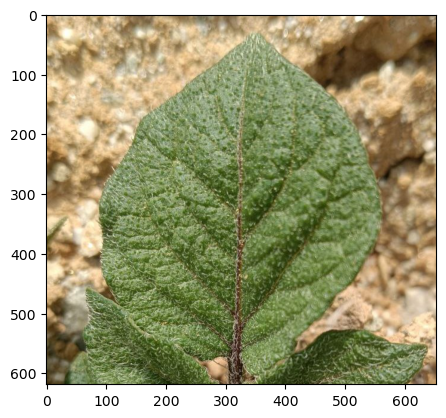

The predicted image is: Potato_healthy


In [45]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
path=r"C:\Users\SOC\Prj_202\po.jpg"
img=image.load_img(path) 
plt.imshow(img) 
plt.show() 
# Convert the PIL Image to a NumPy array
# img_array = image.img_to_array(img)

# Resize the image
img_resized = img.resize((264,264))

# Extract features using img2vec model
features = img2vec.get_vec(img_resized)

# Reshape the features to match the expected input size of the SVM model
features = features.reshape(1, -1)

# Predict the class label using the SVM model
predicted_class_index = svm_model_L.predict(features)[0]
predicted_class = potato_classes[predicted_class_index]

print("The predicted image is:", predicted_class)